# no hsv tanahore 4 with vulkanik

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import joblib

# Fungsi untuk memuat gambar dan label
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            img_flat = img_resized.flatten()
            images.append(img_flat)
            label = "unknown"
            if "Aluvial" in folder:
                label = "aluvial"
            elif "Vulkanik" in folder:
                label = "vulkanik"
            elif "Humus" in folder:
                label = "humus"
            elif "Latosol" in folder:
                label = "latosol"
            elif "Andosol" in folder:
                label = "andosol"
            labels.append(label)
    return images, labels

base_dir = "drive/MyDrive/tanahore4/"

alluvial_images, alluvial_labels = load_images_from_folder(os.path.join(base_dir, "Aluvial"))
vulkanik_images, vulkanik_labels = load_images_from_folder(os.path.join(base_dir, "Vulkanik"))
humus_images, humus_labels = load_images_from_folder(os.path.join(base_dir, "Humus"))
latosol_images, latosol_labels = load_images_from_folder(os.path.join(base_dir, "Latosol"))
andosol_images, andosol_labels = load_images_from_folder(os.path.join(base_dir, "Andosol"))
unknown_images, unknown_labels = load_images_from_folder(os.path.join(base_dir, "Unknown"))

images_list = [alluvial_images, vulkanik_images, humus_images, latosol_images, andosol_images]
labels_list = [alluvial_labels, vulkanik_labels, humus_labels, latosol_labels, andosol_labels]

if unknown_images:
    images_list.append(unknown_images)
    labels_list.append(unknown_labels)

images = np.concatenate(images_list)
labels = np.concatenate(labels_list)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = SVC(kernel='linear')

cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=cv)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

filename = 'svm_model_with_cv.sav'
joblib.dump(model, filename)

print("Model dengan 10-fold cross-validation telah disimpan sebagai", filename)


Cross-validation scores: [0.62857143 0.74285714 0.67142857 0.77142857 0.72857143 0.77142857
 0.65714286 0.65714286 0.76811594 0.71014493]
Mean accuracy: 0.7106832298136645
Model dengan 10-fold cross-validation telah disimpan sebagai svm_model_with_cv.sav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# no hsv tanahore 4

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import joblib

# Fungsi untuk memuat gambar dan label
def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            img_flat = img_resized.flatten()
            images.append(img_flat)
            if "Aluvial" in folder:
                label = "aluvial"
            elif "Humus" in folder:
                label = "humus"
            elif "Latosol" in folder:
                label = "latosol"
            elif "Andosol" in folder:
                label = "andosol"
            labels.append(label)
    return images, labels

base_dir = "drive/MyDrive/dataset tanah/tanahore4/"

alluvial_images, alluvial_labels = load_images_from_folder(os.path.join(base_dir, "Aluvial"))
humus_images, humus_labels = load_images_from_folder(os.path.join(base_dir, "Humus"))
latosol_images, latosol_labels = load_images_from_folder(os.path.join(base_dir, "Latosol"))
andosol_images, andosol_labels = load_images_from_folder(os.path.join(base_dir, "Andosol"))

images_list = [alluvial_images, humus_images, latosol_images, andosol_images]
labels_list = [alluvial_labels, humus_labels, latosol_labels, andosol_labels]

images = np.concatenate(images_list)
labels = np.concatenate(labels_list)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=cv)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

filename = 'svm_model_with_cv.sav'
joblib.dump(model, filename)

print("Model dengan 10-fold cross-validation telah disimpan sebagai", filename)


Cross-validation scores: [0.73333333 0.7        0.79661017 0.71186441 0.79661017 0.76271186
 0.77966102 0.77966102 0.74576271 0.77966102]
Mean accuracy: 0.7585875706214689
Model dengan 10-fold cross-validation telah disimpan sebagai svm_model_with_cv.sav


In [ ]:
model = joblib.load('svm_model_with_cv.sav')

img = cv2.imread("andosol-005.jpg")
img_resized = cv2.resize(img, (224, 224))
img_flat = img_resized.flatten()

model.predict(img_flat.reshape(1, -1))

array(['latosol'], dtype='<U7')

# tanahore 88

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import joblib

# Fungsi untuk memuat gambar dan label
def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            img_flat = img_resized.flatten()
            images.append(img_flat)
            if "Aluvial" in folder:
                label = "aluvial"
            elif "Humus" in folder:
                label = "humus"
            elif "Latosol" in folder:
                label = "latosol"
            elif "Andosol" in folder:
                label = "andosol"
            labels.append(label)
    return images, labels

base_dir = "drive/MyDrive/dataset tanah/tanahore91/"

latosol_images, latosol_labels = load_images_from_folder(os.path.join(base_dir, "Latosol"))
alluvial_images, alluvial_labels = load_images_from_folder(os.path.join(base_dir, "Aluvial"))
humus_images, humus_labels = load_images_from_folder(os.path.join(base_dir, "Humus"))
andosol_images, andosol_labels = load_images_from_folder(os.path.join(base_dir, "Andosol"))

images_list = [alluvial_images, humus_images, latosol_images, andosol_images]
labels_list = [alluvial_labels, humus_labels, latosol_labels, andosol_labels]

images = np.concatenate(images_list)
labels = np.concatenate(labels_list)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=8)
scores = cross_val_score(model, X_train, y_train, cv=cv)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

filename = 'svm_model_with_cv.sav'
joblib.dump(model, filename)

print("Model dengan 10-fold cross-validation telah disimpan sebagai", filename)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(


Cross-validation scores: [1.   1.   0.75 1.   0.75 1.   1.   1.  ]
Mean accuracy: 0.9375
Model dengan 10-fold cross-validation telah disimpan sebagai svm_model_with_cv.sav


Confusion Matrix:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

     aluvial       1.00      1.00      1.00         2
       humus       1.00      1.00      1.00         2
     latosol       1.00      1.00      1.00         2
     andosol       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



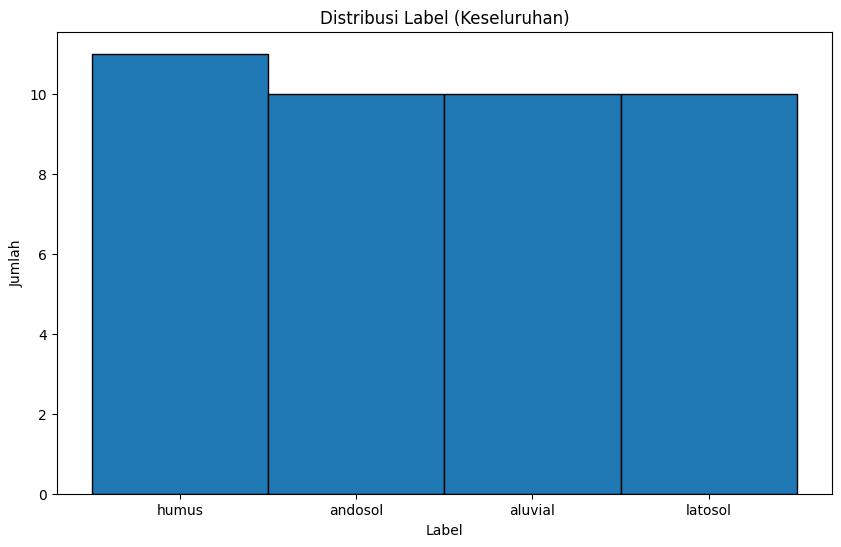

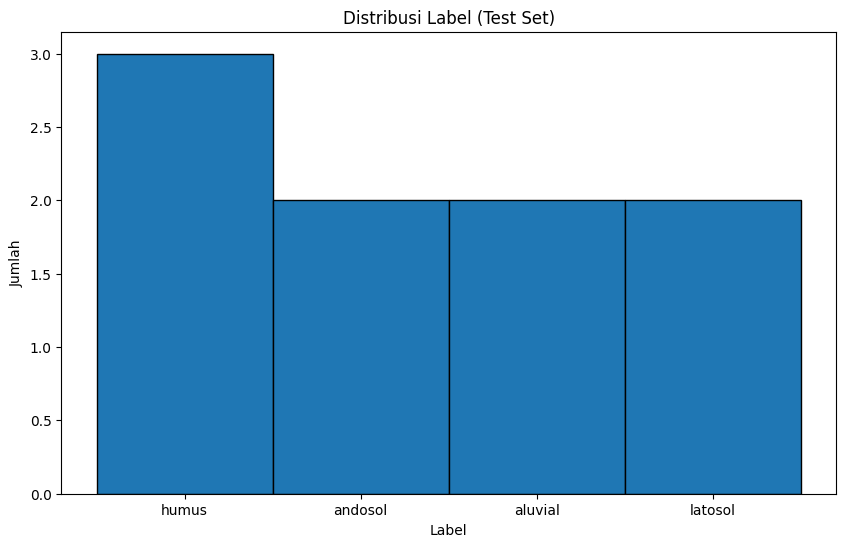

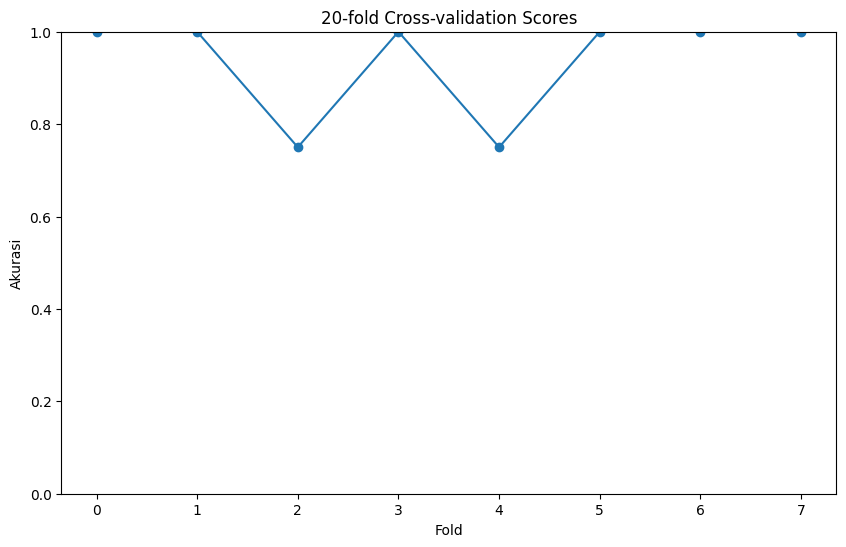

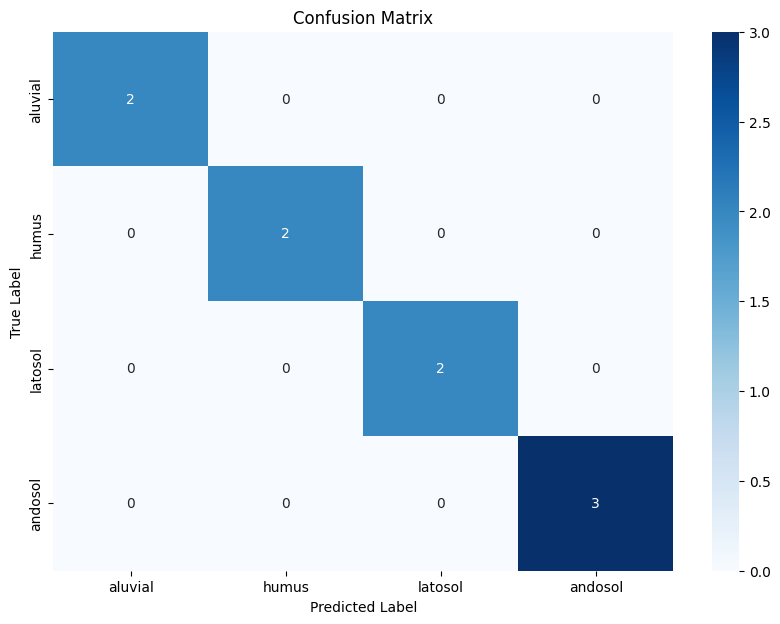

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set

y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred, target_names=["aluvial", "humus", "latosol", "andosol"])
print("Classification Report:")
print(report)

# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
plt.hist(labels, bins=np.arange(len(set(labels)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(labels))), set(labels))
plt.title('Distribusi Label (Keseluruhan)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi label pada test set
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=np.arange(len(set(y_test)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(y_test))), set(y_test))
plt.title('Distribusi Label (Test Set)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o')
plt.title('20-fold Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["aluvial", "humus", "latosol", "andosol"], yticklabels=["aluvial", "humus", "latosol", "andosol"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model = joblib.load('svm_model_with_cv.sav')

img = cv2.imread("andosol.jpg")
img_resized = cv2.resize(img, (224, 224))
img_flat = img_resized.flatten()

model.predict(img_flat.reshape(1, -1))

array(['andosol'], dtype='<U7')

# tanahore 88 normalized

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import joblib

# Fungsi untuk memuat gambar dan label
def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize images to 128x128
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            img = img.flatten()  # Flatten the image
            images.append(img)
            if "Aluvial" in folder:
                label = "aluvial"
            elif "Humus" in folder:
                label = "humus"
            elif "Latosol" in folder:
                label = "latosol"
            elif "Andosol" in folder:
                label = "andosol"
            labels.append(label)
    return images, labels

base_dir = "drive/MyDrive/dataset tanah/tanahore88/"

alluvial_images, alluvial_labels = load_images_from_folder(os.path.join(base_dir, "Aluvial"))
humus_images, humus_labels = load_images_from_folder(os.path.join(base_dir, "Humus"))
latosol_images, latosol_labels = load_images_from_folder(os.path.join(base_dir, "Latosol"))
andosol_images, andosol_labels = load_images_from_folder(os.path.join(base_dir, "Andosol"))

images_list = [alluvial_images, humus_images, latosol_images, andosol_images]
labels_list = [alluvial_labels, humus_labels, latosol_labels, andosol_labels]

images = np.concatenate(images_list)
labels = np.concatenate(labels_list)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=cv)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

filename = 'svm_88.sav'
joblib.dump(model, filename)

print("Model dengan 10-fold cross-validation telah disimpan sebagai", filename)


Cross-validation scores: [0.78571429 0.75       0.85714286 0.75       0.74074074 0.88888889
 0.81481481 0.74074074 0.85185185 0.85185185]
Mean accuracy: 0.8031746031746032
Model dengan 10-fold cross-validation telah disimpan sebagai svm_88.sav


Confusion Matrix:
[[15  2  0  0]
 [ 5  7  1  1]
 [ 0  3 17  0]
 [ 0  0  0 18]]
Classification Report:
              precision    recall  f1-score   support

     aluvial       0.75      0.88      0.81        17
       humus       0.58      0.50      0.54        14
     latosol       0.94      0.85      0.89        20
     andosol       0.95      1.00      0.97        18

    accuracy                           0.83        69
   macro avg       0.81      0.81      0.80        69
weighted avg       0.82      0.83      0.82        69



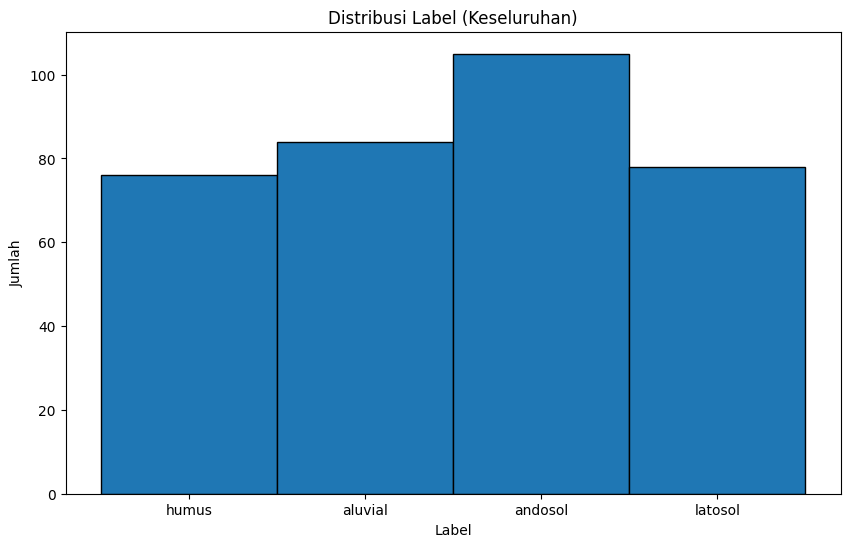

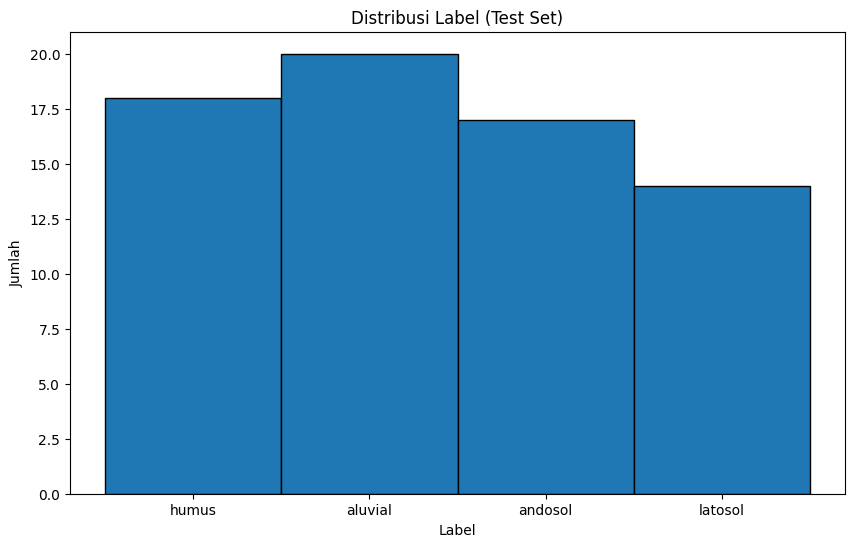

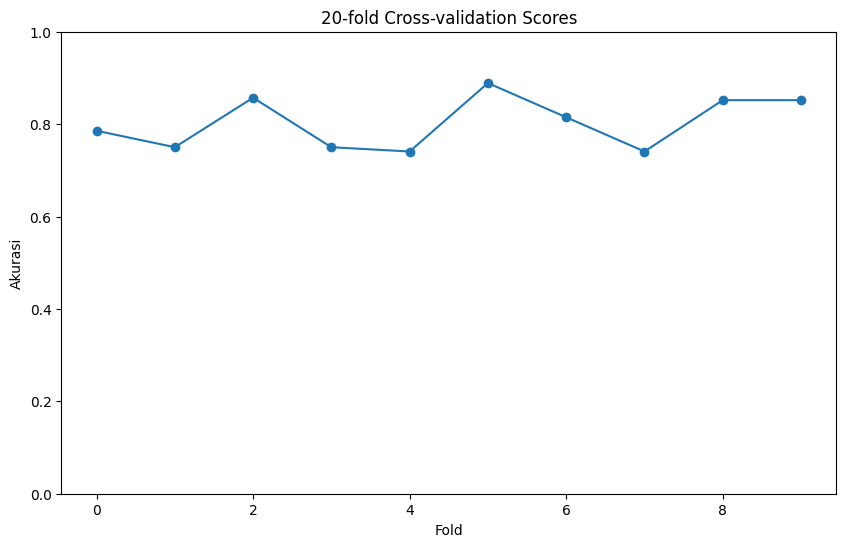

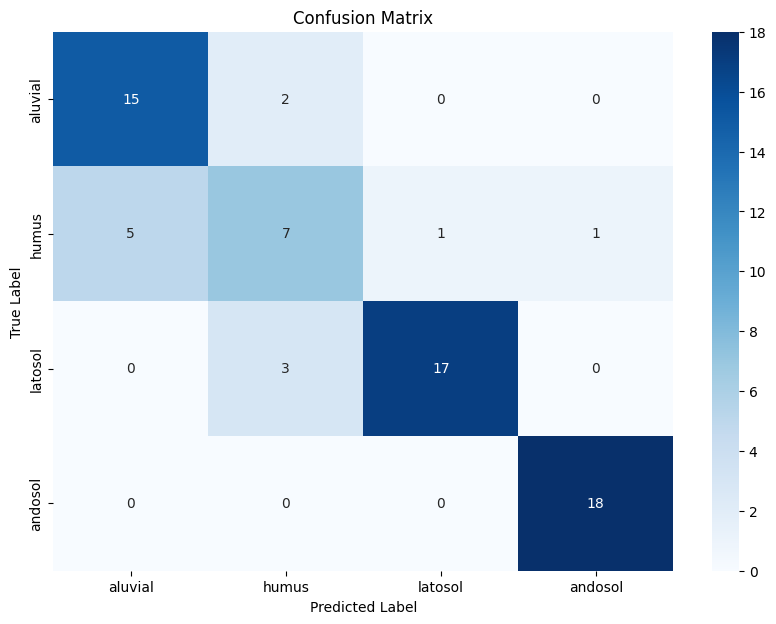

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set

y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred, target_names=["aluvial", "humus", "latosol", "andosol"])
print("Classification Report:")
print(report)

# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
plt.hist(labels, bins=np.arange(len(set(labels)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(labels))), set(labels))
plt.title('Distribusi Label (Keseluruhan)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi label pada test set
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=np.arange(len(set(y_test)) + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(len(set(y_test))), set(y_test))
plt.title('Distribusi Label (Test Set)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o')
plt.title('20-fold Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["aluvial", "humus", "latosol", "andosol"], yticklabels=["aluvial", "humus", "latosol", "andosol"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model = joblib.load('svm_88.sav')

img = cv2.imread("aluvial2.jpg")
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
img = img.flatten()

model.predict(img.reshape(1, -1))

array(['aluvial'], dtype='<U7')